# Milestone 2

```
Nama    : Aziz Dharmawan Apray
FTDS Batch 008
```

---
In this assignment, I use Twitter API to collect the dataset about any tweet which related to a new Disney Pixar movie "Turning Red".

## Objective
Doing a sentiment analysis about "Turning Red" and make a model sentiment analysis prediction. MULTI CLASS / MULTI LABEL

## Working Area

### 1 - Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
import string
import pickle

import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk.corpus import stopwords
stop = set(stopwords.words("english"))
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.tokenize import word_tokenize



import warnings
warnings.filterwarnings('ignore')

In [2]:
film = pd.read_csv('turning_red_sentiment.csv')
film_ori = film.copy()
film

,user,tanggal,bahasa,isi,polarity,sentiment
0,1494093565818986497,2022-03-26 03:35:54+00:00,en,If my mom embarrassed me like the one in turni...,0.000000,netral
1,1312859047931129856,2022-03-26 03:35:26+00:00,en,i want to be that one emo chick from turning red,0.000000,netral
2,1354193051330068480,2022-03-26 03:35:20+00:00,en,ok i just think madame yu and jiang cheng Turn...,0.250000,positif
3,1232931837569269760,2022-03-26 03:35:15+00:00,en,the song from turning red is stuck in my head 😣,0.000000,netral
4,1303160196995391488,2022-03-26 03:35:12+00:00,en,"Turning Red is a fictional story, you can tell...",0.066667,positif
...,...,...,...,...,...,...
994,16541356,2022-03-25 23:23:23+00:00,en,"Out of all the girls in Turning Red, who is th...",-0.250000,negatif
995,458996974,2022-03-25 23:23:21+00:00,en,"no one talk to me I’m watching turning red, by...",0.000000,netral
996,1318362976802492416,2022-03-25 23:23:06+00:00,en,current mood \r\nlistening to the turning red ...,0.133333,positif
997,1395650972483993603,2022-03-25 23:23:01+00:00,en,Just icing it has helped a lot now it’s not so...,0.189583,positif


### 2 - EDA

In [3]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user       999 non-null    int64  
 1   tanggal    999 non-null    object 
 2   bahasa     999 non-null    object 
 3   isi        999 non-null    object 
 4   polarity   999 non-null    float64
 5   sentiment  999 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [4]:
film

,user,tanggal,bahasa,isi,polarity,sentiment
0,1494093565818986497,2022-03-26 03:35:54+00:00,en,If my mom embarrassed me like the one in turni...,0.000000,netral
1,1312859047931129856,2022-03-26 03:35:26+00:00,en,i want to be that one emo chick from turning red,0.000000,netral
2,1354193051330068480,2022-03-26 03:35:20+00:00,en,ok i just think madame yu and jiang cheng Turn...,0.250000,positif
3,1232931837569269760,2022-03-26 03:35:15+00:00,en,the song from turning red is stuck in my head 😣,0.000000,netral
4,1303160196995391488,2022-03-26 03:35:12+00:00,en,"Turning Red is a fictional story, you can tell...",0.066667,positif
...,...,...,...,...,...,...
994,16541356,2022-03-25 23:23:23+00:00,en,"Out of all the girls in Turning Red, who is th...",-0.250000,negatif
995,458996974,2022-03-25 23:23:21+00:00,en,"no one talk to me I’m watching turning red, by...",0.000000,netral
996,1318362976802492416,2022-03-25 23:23:06+00:00,en,current mood \r\nlistening to the turning red ...,0.133333,positif
997,1395650972483993603,2022-03-25 23:23:01+00:00,en,Just icing it has helped a lot now it’s not so...,0.189583,positif


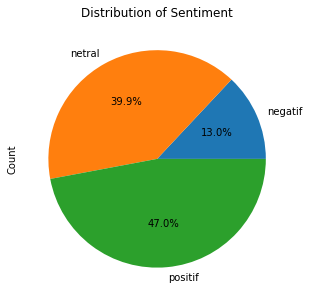

In [5]:
plt.figure(figsize=(8,5))
film['sentiment'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Sentiment")
# plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

### 3 - Data Preprocessing

In [6]:
# Function for cleaning tweet data

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"    # emoticons
        u"\U0001F300-\U0001F5FF"    # symbols & pictographs
        u"\U0001F680-\U0001F6FF"    # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"    # flags  (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

def remove_number(text):
    number = re.compile(r"\w*\d\w*")
    return number.sub(r"", text)

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def lemmatizing(text):
    text = [lemma.lemmatize(word) for word in text.split()]
    return " ".join(text)

def word_token(data):
    tokenized_word = word_tokenize(data)
    return tokenized_word
token = lambda x: word_token(x)

def to_sentence(list_words):
    sentence = " ".join(word for word in list_words)
    return sentence

In [7]:
# Cleaning tweet data

film["isi"] = film["isi"].map(lambda x: remove_URL(x))
film["isi"] = film["isi"].map(lambda x: remove_html(x))
film["isi"] = film["isi"].map(lambda x: remove_emoji(x))
film["isi"] = film["isi"].map(lambda x: remove_punct(x))
film["isi"] = film["isi"].map(lambda x: remove_number(x))

film["isi"] = film["isi"].map(remove_stopwords)

film["isi"] = film["isi"].map(lemmatizing)

# film["isi"] = film["isi"].map(token)

In [8]:
film["isi"]

0      mom embarrassed like one turning red i’d fight...
1                         want one emo chick turning red
2          ok think madame yu jiang cheng turning red au
3                            song turning red stuck head
4      turning red fictional story tell it’s set “can...
                             ...                        
994            girl turning red biggest jackass fan abby
995             one talk i’m watching turning red byeeee
996    current mood listening turning red sound track...
997    icing helped lot it’s red lol gonna purple tho...
998    watched turning red reminded hate ginger god o...
Name: isi, Length: 999, dtype: object

In [9]:
# Drop unused columns

film = film.drop(columns=['user','tanggal','bahasa','polarity'])
film

,isi,sentiment
0,mom embarrassed like one turning red i’d fight...,netral
1,want one emo chick turning red,netral
2,ok think madame yu jiang cheng turning red au,positif
3,song turning red stuck head,netral
4,turning red fictional story tell it’s set “can...,positif
...,...,...
994,girl turning red biggest jackass fan abby,negatif
995,one talk i’m watching turning red byeeee,netral
996,current mood listening turning red sound track...,positif
997,icing helped lot it’s red lol gonna purple tho...,positif


In [10]:
# Split data into feature and target
X = film['isi']
y = film['sentiment']

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0, stratify=y)

# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 886


In [11]:
X = film['isi']
y = film['sentiment']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0, stratify=y)

In [13]:
# Create the word vector with CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [14]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 886


In [15]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [16]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,aaaaaaaaaaaaaaaaaa,abby,abeehatariqart,ability,absolutely,abstract,accepting,according,achievement,actually,...,year,yeh,yes,yesandagain,yet,yo,yooo,youre,youtube,yuantwst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Xtrain = count_vect_train
Xtest = count_vect_test

In [18]:
# Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 8)
    plt.yticks(tick_marks, classes, fontsize = 8)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 15)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 10)
    plt.xlabel('Predicted Label', fontsize = 10)

    return plt

def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(6, 5))
    plot = plot_confusion_matrix(cm, classes=['Negatif','Netral','Positif'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

### 4 - Modeling

Train - f1-score: 0.9375939526693297
Test - f1-score: 0.4844749009855393


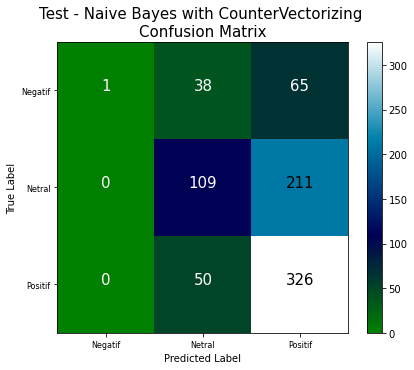

In [19]:
# Call the modeling function for Naive Bayes with countvectorizer and print f1 score
def nb_sentiment():
    nb = MultinomialNB()
    nb.fit(Xtrain, y_train)
    y_pred_nb_train = nb.predict(Xtrain)
    y_pred_nb_test = nb.predict(Xtest)
    score_nb_train = f1_score(y_train, y_pred_nb_train, average="weighted")
    score_nb_test = f1_score(y_test, y_pred_nb_test, average="weighted")

    print("Train - f1-score: {}".format(score_nb_train))
    print("Test - f1-score: {}".format(score_nb_test))

    disp_confusion_matrix(y_pred_nb_test, "Test - Naive Bayes")

nb_sentiment()

Train - f1-score: 0.9949414107161779
Test - f1-score: 0.6563833887252178


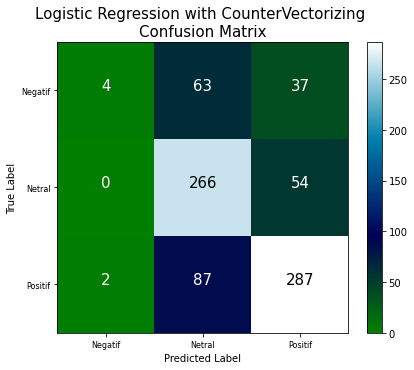

In [20]:
# Call the modeling function for Logistic Regression with countvectorizer and print f1 score
def lg_sentiment():
    lg = LogisticRegression()
    lg.fit(Xtrain, y_train)
    y_pred_lg_train = lg.predict(Xtrain)
    y_pred_lg_test = lg.predict(Xtest)
    score_lg_train = f1_score(y_train, y_pred_lg_train, average="weighted")
    score_lg_test = f1_score(y_test, y_pred_lg_test, average="weighted")

    print("Train - f1-score: {}".format(score_lg_train))
    print("Test - f1-score: {}".format(score_lg_test))

    disp_confusion_matrix(y_pred_lg_test, "Logistic Regression")

lg_sentiment()

Train - f1-score: 0.8918581725027749
Test - f1-score: 0.6302871426948237


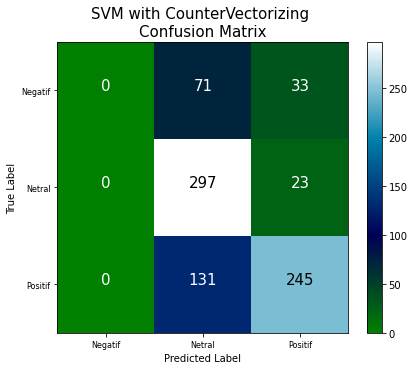

In [21]:
# Call the modeling function for SVM with countvectorizer and print f1 score
def svm_sentiment():
    svm = SVC()
    svm.fit(Xtrain, y_train)
    y_pred_svm_train = svm.predict(Xtrain)
    y_pred_svm_test = svm.predict(Xtest)
    score_svm_train = f1_score(y_train, y_pred_svm_train, average="weighted")
    score_svm_test = f1_score(y_test, y_pred_svm_test, average="weighted")

    print("Train - f1-score: {}".format(score_svm_train))
    print("Test - f1-score: {}".format(score_svm_test))

    disp_confusion_matrix(y_pred_svm_test, "SVM")

svm_sentiment()

Train - f1-score: 1.0
Test - f1-score: 0.6606364179257309


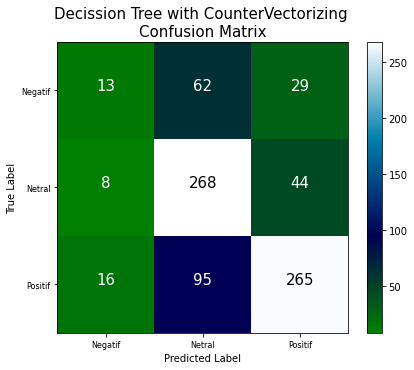

In [22]:
# Call the modeling function for Decission Tree with countvectorizer and print f1 score
def dt_sentiment():
    dt = DecisionTreeClassifier()
    dt.fit(Xtrain, y_train)
    y_pred_dt_train = dt.predict(Xtrain)
    y_pred_dt_test = dt.predict(Xtest)
    score_dt_train = f1_score(y_train, y_pred_dt_train, average="weighted")
    score_dt_test = f1_score(y_test, y_pred_dt_test, average="weighted")

    print("Train - f1-score: {}".format(score_dt_train))
    print("Test - f1-score: {}".format(score_dt_test))

    disp_confusion_matrix(y_pred_dt_test, "Decission Tree")

dt_sentiment()

### 5 - Model Improvement

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
# Pipeline
pipe = Pipeline([('classifier', LogisticRegression())])

# Parameter for each classifier
params_grid = [{
                'classifier':[LogisticRegression()],
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
                },
                {
                'classifier':[SVC()],
                'classifier__kernel':['linear','rbf'],
                'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100]
                },
                {
                'classifier':[DecisionTreeClassifier()],
                'classifier__max_depth':[2, 4, 6],
                'classifier__min_samples_split':[2, 3]
                },
                {
                'classifier':[MultinomialNB()],
                'classifier__alpha':[0.6, 0.8, 1.0]
                }]

# GridSearchCV
grid = GridSearchCV(pipe, params_grid, cv=3, n_jobs=2).fit(Xtrain, y_train)

In [25]:
# GridSearchCV output
print('Best parameters :', grid.best_params_)
print('\nBest cross-validation score :', grid.best_score_)
print('\nBest estimator :', grid.best_estimator_)

Best parameters : {'classifier': LogisticRegression(C=10), 'classifier__C': 10}

Best cross-validation score : 0.6131463892657921

Best estimator : Pipeline(steps=[('classifier', LogisticRegression(C=10))])


In [26]:
# Get the best estimator 
best_grid = grid.best_estimator_

In [27]:
# Predict the best model to X_train and X_test
y_pred_train = best_grid.predict(Xtrain)
y_pred_test = best_grid.predict(Xtest)

# Classification Report
print('-'*25, 'Train-Set', '-'*25)
print(classification_report(y_train, y_pred_train))
print('-'*25, 'Test-Set', '-'*25)
print(classification_report(y_test, y_pred_test))

------------------------- Train-Set -------------------------
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00        26
      netral       1.00      1.00      1.00        79
     positif       1.00      1.00      1.00        94

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

------------------------- Test-Set -------------------------
              precision    recall  f1-score   support

     negatif       0.71      0.10      0.17       104
      netral       0.65      0.83      0.73       320
     positif       0.76      0.76      0.76       376

    accuracy                           0.70       800
   macro avg       0.71      0.56      0.55       800
weighted avg       0.71      0.70      0.67       800



In [28]:
score_best_grid_train = f1_score(y_train, y_pred_train, average="weighted")
score_best_grid_test = f1_score(y_test, y_pred_test, average="weighted")

print("Train - f1-score: {}".format(score_best_grid_train))
print("Test - f1-score: {}".format(score_best_grid_test))

Train - f1-score: 1.0
Test - f1-score: 0.6674448572091943


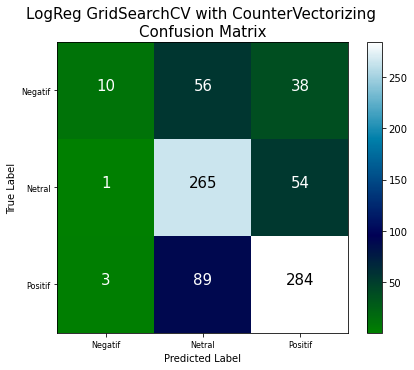

In [29]:
disp_confusion_matrix(y_pred_test, "LogReg GridSearchCV")

The best parameter still over fit the test set. So I continue with embedding.

### 6 - Embedding (TF-IDF)

In [30]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

Train - f1-score: 0.740611111366395
Test - f1-score: 0.5215031576053007


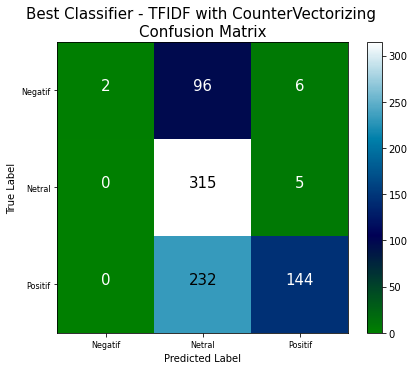

In [31]:
def best_grid_sentiment():
    # tfidf_nb = MultinomialNB()
    # tfidf_nb.fit(tfidf_vect_train, y_train)
    y_pred_best_grid_train = best_grid.predict(tfidf_vect_train)
    y_pred_best_grid_test = best_grid.predict(tfidf_vect_test)
    score_best_grid_train = f1_score(y_train, y_pred_best_grid_train, average="weighted")
    score_best_grid_test = f1_score(y_test, y_pred_best_grid_test, average="weighted")

    print("Train - f1-score: {}".format(score_best_grid_train))
    print("Test - f1-score: {}".format(score_best_grid_test))

    disp_confusion_matrix(y_pred_best_grid_test, "Best Classifier - TFIDF")

best_grid_sentiment()

After Embedding proses, now the model is not over fit and can predict the test set better.

But, as shown from the confussion matrix, this model cannot predict well in negative values.

So, for predicting a better number in negative values, the pre train model will be used.

### 7 - Inferencing Model

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def vader_sentiment_analyzer(sentence):
    score = analyser.polarity_scores(sentence)
    print("Tweet:", sentence)
    print("Score:", score)

    print("Sentence Overall Rated As", end = " ")
    
    if score['compound'] >= 0.05 :
        print("--Positive--")
    elif score['compound'] <= - 0.05 :
        print("--Negative--")
    else :
        print("--Neutral--")

In [33]:
new_data = ["This movie is very cool",
            "Typical asian parents",
            "Really love the theme songs, 4-town",
            "This movie just stereotyping the asian family culture",
            "Ridiculous how they describe it",
            "Watching turning red and gosh i am having so many feels",
            "The most unrealistic part of Turning Red is that not one of those canonically weird ass little 13 year olds hissed at someone like a cat where’s the honest representation smh",
            "what i was saying is that you don’t need to change the personalities or appearances of the characters in order for it to suit your criteria like leon still can be dominant despite being shorter than raihan but yeah",
            "Why did I sit and cry the whole time through turning red. I love it",
            "Turning Red is awful and I’m being forced to watch it again."]

In [34]:
for tweet in new_data:
    vader_sentiment_analyzer(tweet)
    print("")

Tweet: This movie is very cool
Score: {'neg': 0.0, 'neu': 0.607, 'pos': 0.393, 'compound': 0.3804}
Sentence Overall Rated As --Positive--

Tweet: Typical asian parents
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence Overall Rated As --Neutral--

Tweet: Really love the theme songs, 4-town
Score: {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6697}
Sentence Overall Rated As --Positive--

Tweet: This movie just stereotyping the asian family culture
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence Overall Rated As --Neutral--

Tweet: Ridiculous how they describe it
Score: {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}
Sentence Overall Rated As --Negative--

Tweet: Watching turning red and gosh i am having so many feels
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentence Overall Rated As --Neutral--

Tweet: The most unrealistic part of Turning Red is that not one of those canonically weird ass little 13 year

### 8 - Conclussion

1. **Based on dataset**:
    1. I used my own dataset which scrapping tweets from Twitter API about a new Disney Pixar movie Turning Red.
    2. The process for collecting the dataset is not include in this notebook.
    3. Most of the tweets known as a positive sentiment to the movie:
        - positive: 47 %
        - neutral: 40 %
        - negative: 13 %
2. **Based on model side**:
    1. All base model is over-fitting the the test set and quite random in predicting the sentiment.
    2. Hyperparameter tuning from those base models with the GridSearchCV generate a result
        - Best parameters : **'classifier': LogisticRegression(C=10), 'classifier__C': 10'**
        - Best cross-validation score : **0.61**.
    3. Overall the model is over-fitting the test set and cannot predict well the negative sentiment
    4. After did the embedding process to the model, the model still over-fitting the test set and have a lower f1-score. This model still cannot predict well the negative sentiment.